In [4]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for linear regression
from sklearn.linear_model import LinearRegression

In [7]:
boston = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

boston.columns = column_names

In [9]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### Create an x variable with 200 observations that are normally distributed:

In [13]:
np.random.seed(29)
### numpy.random.randn is a function that generates random numbers from a standard normal distribution 
### (also known as the Gaussian distribution or the normal distribution) 
### with a mean of 0 and a standard deviation of 1.
x = np.random.randn(200)

##### Create a y variable that is linearly related to x with some added random noise

In [14]:
y = x * 10 + np.random.randn(200) * 2

##### Create a dataframe with the x and y variables:

In [15]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

In [17]:
data.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


##### Plot a scatter plot to visualize the linear relationship

Text(0.5, 28.999999999999986, 'Independent Variable')

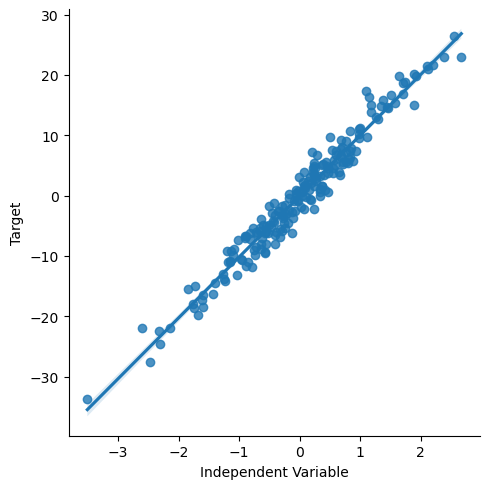

In [21]:
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel("Target")
plt.xlabel("Independent Variable")

**To evaluate the linear relationship using residual plots, we need to carry out a few more steps**

###### Build a linear regression model between x and y

In [22]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

##### Make predictions of y using the fitted linear model:

In [23]:
predictions = linreg.predict(data['x'].to_frame())

##### Calculate the residuals, that is, the difference between the predictions and the real outcome, y:

In [26]:
residuals = data['y'] - predictions

##### Make a scatter plot of the independent variable x and the residuals

Text(0.5, 0, 'Independent variable x')

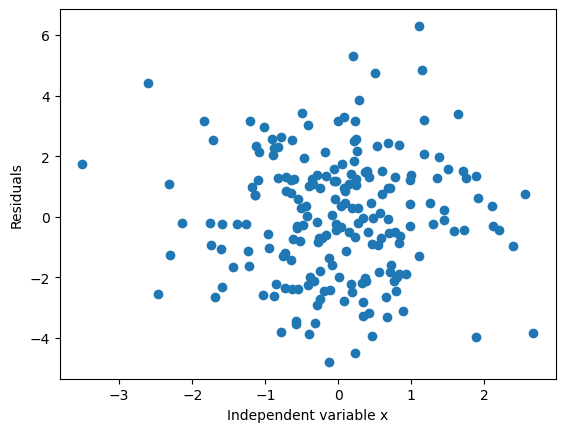

In [27]:
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

##### Finally, let's evaluate the distribution of the residuals:

C:\Users\SachinDev\AppData\Local\Temp\ipykernel_24512\3522060498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


Text(0.5, 0, 'Residuals')

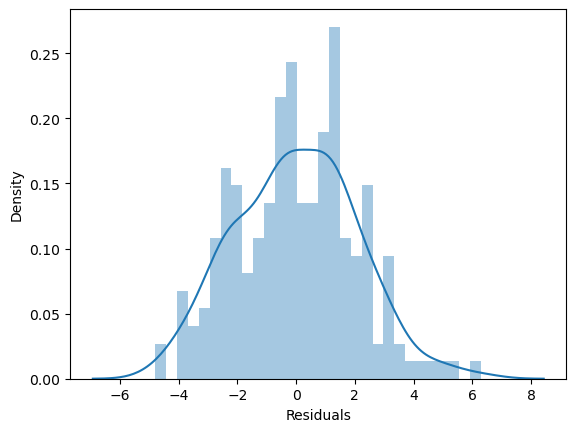

In [28]:
sns.distplot(residuals,bins=30)
plt.xlabel('Residuals')

#### Using Dataset

Text(0, 0.5, 'MEDV')

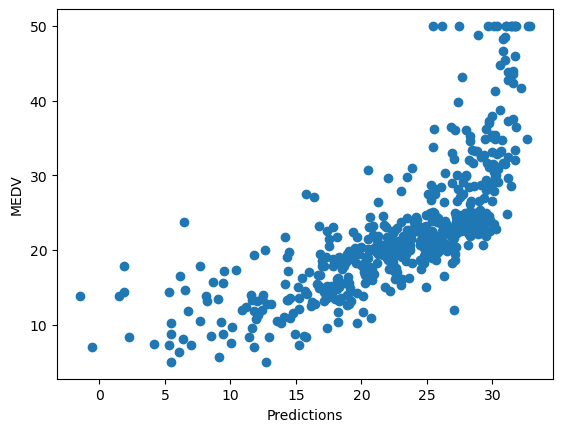

In [29]:
# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

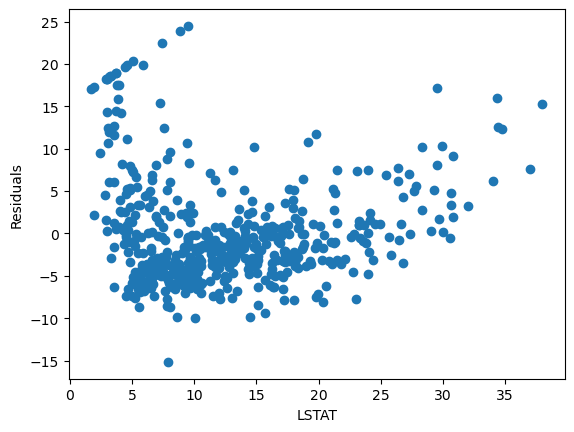

In [30]:
plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

C:\Users\SachinDev\AppData\Local\Temp\ipykernel_24512\2086087768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=30)


<Axes: xlabel='MEDV', ylabel='Density'>

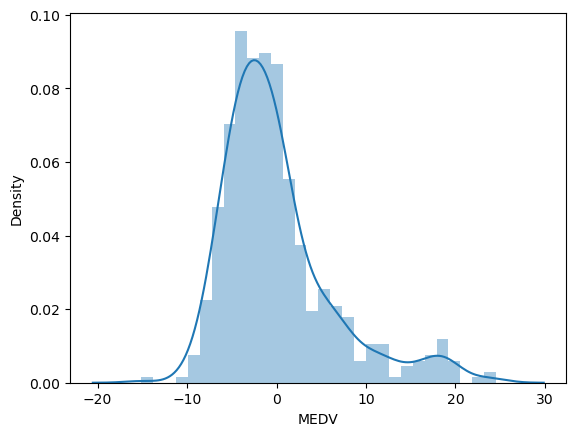

In [31]:
sns.distplot(error, bins=30)

For this particular case, the residuals are centered around zero, but they are not homogeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.